# Customer Analytics: Exploratory Analysis of Bank Marketing Data

**About Dataset**: The data is related with direct marketing campaigns of a Portuguese banking institution. Dataset has data on customer demogrpahics, customer loans subscription, previous marketing campaigns of the bank and economic variables.

**Target Variable**: The marketing campaigns were based on phone calls for sale of term deposits & the target variable is subscription of term deposit.


Here I am doing exploratory data analysis to get a sense of the dataset and see distribution of target variable (subscriptions/conversions) WRT important predictor variables like age-group, education, marital staus etc.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv(r'E:\Programs\GDrive_Vikrantarora25\Analytics\Marketing Data Science book_Hands-On\Chapter02\python\bank-additional-full.csv',sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df['conversion']=df["y"].apply(lambda x:1 if x=='yes' else 0)

In [7]:
print( 'total conversion {} out of {}'.format(df.conversion.sum(), df.conversion.count()))

total conversion 4640 out of 41188


In [8]:
print( "conversion rate: {} %".format(df.conversion.sum()*100/df.conversion.count()))

conversion rate: 11.26541711178013 %


# Conversion rates by Age

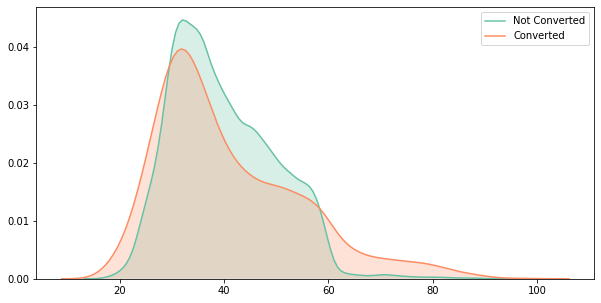

In [9]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df['conversion']==0,'age'],color=sns.color_palette("Set2")[0],shade=True, label="Not Converted")
sns.kdeplot(df.loc[df['conversion']==1,'age'],color=sns.color_palette("Set2")[1],shade=True, label="Converted");

In [10]:
conversion_byage_abso=df.groupby('age', as_index=False)['conversion'].sum()
conversion_byage_abso.head()

,age,conversion
0,17,2
1,18,12
2,19,20
3,20,23
4,21,29


In [11]:
conversion_byage_percent=pd.DataFrame(
    df.groupby('age')['conversion'].sum()*100/df.groupby('age')['conversion'].count())

conversion_byage_percent.reset_index(inplace=True)
conversion_byage_percent.head()

,age,conversion
0,17,40.000000
1,18,42.857143
2,19,47.619048
3,20,35.384615
4,21,28.431373


In [12]:
conversion_byage_percent.rename(columns={"conversion": "conversion rate"},inplace=True)

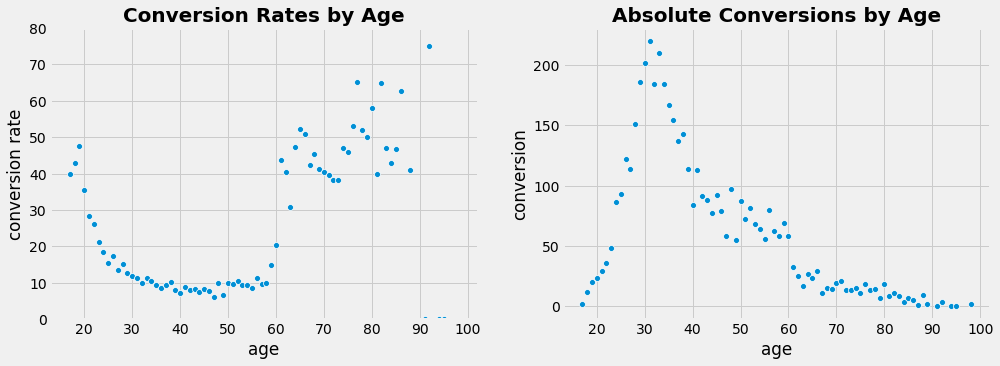

In [13]:
plt.style.use('fivethirtyeight')

fig, ax=plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(x=conversion_byage_percent['age'],y=conversion_byage_percent['conversion rate'], ax=ax[0])
ax[0].set_title('Conversion Rates by Age',size=20,weight='bold')
ax[0].set(ylim=(0,80))

sns.scatterplot(x=conversion_byage_abso['age'],y=conversion_byage_abso['conversion'], ax=ax[1])
ax[1].set_title('Absolute Conversions by Age',size=20,weight='bold');

From graph above:
- Ages 25-60 have low conersion rates and they are lowest (less than or close to 10%) for ages 30-55/57 and intersetingly this age group have high absolute number of conversions indicating most of the customers of term deposists are 30-55 yrs but its difficult to convert them

- Age groups <25 and >60 have high conversion rates as young adults & old are easy to convince & want to invest in safe term deposists instaed of risky investments like stocks, MF's.


# Age Groups

In [14]:
age_bins=[15,25,35,45,55,65,70,80,100]

cats=pd.cut(df['age'],bins=age_bins,right=False)
cats.head()

0    [55, 65)
1    [55, 65)
2    [35, 45)
3    [35, 45)
4    [55, 65)
Name: age, dtype: category
Categories (8, interval[int64]): [[15, 25) < [25, 35) < [35, 45) < [45, 55) < [55, 65) < [65, 70) < [70, 80) < [80, 100)]

In [15]:
df['age_group']=cats

In [16]:
conversions_by_age_group=pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

conversions_by_age_group.reset_index(inplace=True)
conversions_by_age_group

,age_group,conversion
0,"[15, 25)",256
1,"[25, 35)",1666
2,"[35, 45)",1168
3,"[45, 55)",753
4,"[55, 65)",484
5,"[65, 70)",92
6,"[70, 80)",144
7,"[80, 100)",77


In [17]:
conversion_rate_by_age_group = pd.DataFrame(df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0)

conversion_rate_by_age_group.rename(columns={'conversion':'conversion rate'},inplace=True)
conversion_rate_by_age_group.reset_index(inplace=True)

In [18]:
conversion_rate_by_age_group

,age_group,conversion rate
0,"[15, 25)",23.970037
1,"[25, 35)",12.173024
2,"[35, 45)",8.651852
3,"[45, 55)",8.651195
4,"[55, 65)",13.568825
5,"[65, 70)",47.422680
6,"[70, 80)",45.141066
7,"[80, 100)",51.333333


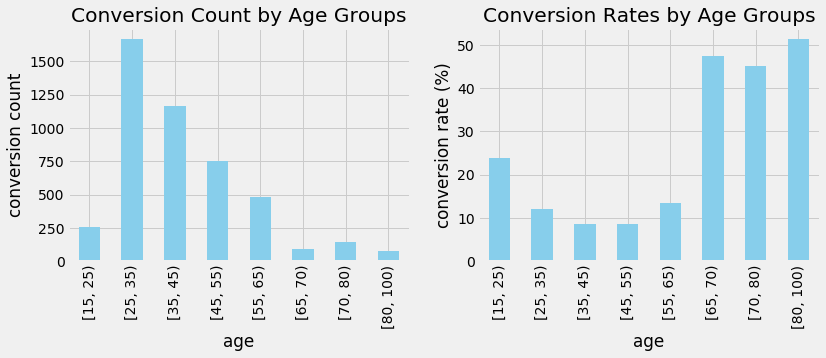

In [19]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

conversions_by_age_group.plot(x='age_group',y='conversion',
    kind='bar',
    color='skyblue',
    grid=True,
    title='Conversion Count by Age Groups', ax=ax[0])

ax[0].set_xlabel('age')
ax[0].set_ylabel('conversion count')
ax[0].get_legend().remove()

conversion_rate_by_age_group.plot(x='age_group',y='conversion rate',
    kind='bar',
    color='skyblue',
    grid=True,
    title='Conversion Rates by Age Groups', ax=ax[1])

ax[1].set_xlabel('age')
ax[1].set_ylabel('conversion rate (%)')
ax[1].get_legend().remove()


plt.show()

Observations:

**Absolute Conversions:**

- Most of the conversions/customers are in young working age group 25-45 and followed by older group 45-65


- Highest conversions is in 25-35 group as this age group has less expenses & therefore high savings, followed by 35-45 & 45-55.  


- Older people (>65) don't invest much in term deposits which is understandable given they don't earn


**Conversion Rate:**

- Working age groups have low conversion rate esp. 35-55 customers, this may be because many of these customers/people may invest in other types of investments like stocks, Mutual funds, pension policies etc. **Though large in absolute terms these customers are hard to obtain as is evident from low conversion rate, thus bank should have friendly policies for 35-55 group & allocate good amount of marketing resources.**


- 25-35 customers have slighly better conv rate, since these customers save high amounts bank should also have friendly policies for them & have high marketing resources allocated to this group. 


- Older age groups(>65) have high conv rate but these are low in absolute terms, high amount og marketing resources should not be used on them 

# Conversions by Education

In [20]:
df['education_1']=df['education'].apply(
    lambda x: 'illiterate' if x=='illiterate'\
    else 'basic' if x in ('basic.4y','basic.6y','basic.9y')\
    else 'high school' if x=='high.school'\
    else 'college' if x in ('professional.course','university.degree')\
    else 'unknown'
)

In [21]:
df['education_1'].value_counts()

college        17411
basic          12513
high school     9515
unknown         1731
illiterate        18
Name: education_1, dtype: int64

In [22]:
conversions_by_edu=pd.pivot_table(df,values='y',index='education_1',columns="conversion", aggfunc=len)
conversions_by_edu

conversion,0,1
education_1,,
basic,11424,1089
college,15146,2265
high school,8484,1031
illiterate,14,4
unknown,1480,251


In [23]:
conversions_by_edu.columns=['no conversions', 'conversions']

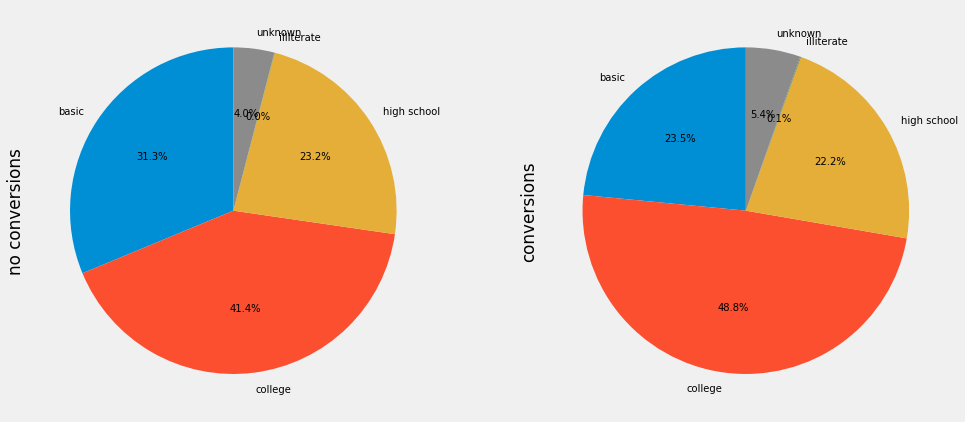

In [24]:
conversions_by_edu.plot(
    kind='pie',
    figsize=(15,7),
    subplots=True,
    startangle=90,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False,
    fontsize=10);

##Definition: df.plot(frame=None, x=None, y=None, subplots=False, sharex=True, sharey=False, use_index=True, 
#figsize=None, grid=None, legend=True, rot=None, ax=None, style=None, title=None, xlim=None, ylim=None, 
#logx=False, logy=False, xticks=None, yticks=None, kind='line', sort_columns=False, fontsize=None, secondary_y=False, **kwds)

In [25]:
conversions_by_edu['conversion rate']=conversions_by_edu['conversions']*100/conversions_by_edu['no conversions']
conversions_by_edu.reset_index(inplace=True)
conversions_by_edu

,education_1,no conversions,conversions,conversion rate
0,basic,11424,1089,9.532563
1,college,15146,2265,14.954443
2,high school,8484,1031,12.152287
3,illiterate,14,4,28.571429
4,unknown,1480,251,16.959459


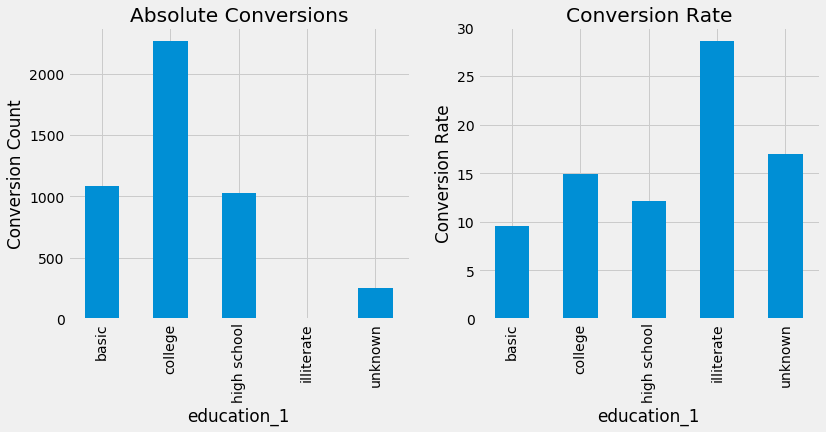

In [26]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

conversions_by_edu.plot(x="education_1", y='conversions',kind='bar',ax=ax[0], title="Absolute Conversions")
ax[0].set_ylabel('Conversion Count')
ax[0].get_legend().remove()

conversions_by_edu.plot(x="education_1", y='conversion rate',kind='bar',ax=ax[1], title="Conversion Rate");
ax[1].set_ylabel('Conversion Rate')
ax[1].get_legend().remove()

Observations:
    
- Highest amount of customers are in college educated group, followed by basic & high school. 


- **Bank should allocate marketing resources so that more conversions can be done from basic & high school population, college educated people are knowledgeable about financial planning/savings so may be basic & high school groups should have more marketing focus**


- Illiterate group is better ignored as there are hardly any conversions.

# Last Contact Duration

In [30]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [31]:
#converting duration to minutes
duration_conversions = df.loc[df["conversion"]==1,'duration']/(60)
duration_conversions.head()

75     26.250000
83     17.366667
88     24.450000
129     9.650000
139     7.683333
Name: duration, dtype: float64

In [32]:
#converting duration to minutes
duration_non_conversions = df.loc[df["conversion"]==0,'duration']/(60)
duration_non_conversions.head()

0    4.350000
1    2.483333
2    3.766667
3    2.516667
4    5.116667
Name: duration, dtype: float64

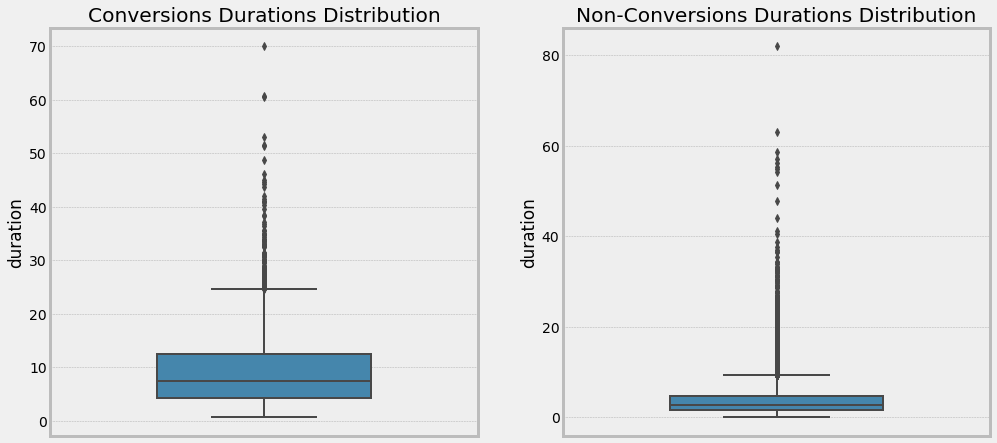

In [33]:
plt.style.use('bmh')
fig,ax=plt.subplots(1,2,figsize=(15,7))

sns.boxplot(y=duration_conversions,ax=ax[0],width=0.5)
ax[0].set_title('Conversions Durations Distribution')


sns.boxplot(y=duration_non_conversions,ax=ax[1],width=0.5)
ax[1].set_title('Non-Conversions Durations Distribution');